### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience


# Data Preprocessing 

In [50]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from joblib import dump
%matplotlib inline

In [51]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [52]:
df.drop('Serial No.', axis=1, inplace=True)
df.drop('SOP', axis=1, inplace=True)
df.drop('LOR', axis=1, inplace=True)


In [53]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [54]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
University Rating,,,,,
4.3,316.857143,105.857143,8.434286,0.571429,0.428571
15.0,317.000000,110.000000,8.880000,0.000000,0.000000
16.0,317.000000,110.000000,8.880000,0.000000,0.000000
17.5,317.833333,104.833333,8.973333,0.666667,0.500000
20.0,317.000000,110.000000,8.880000,0.000000,1.000000
29.9,315.333333,106.000000,8.495000,0.333333,0.500000
36.6,316.000000,107.833333,7.683333,0.333333,0.500000
46.4,310.500000,105.666667,8.076667,0.500000,0.500000
47.0,317.000000,110.000000,8.880000,0.000000,1.000000


In [55]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [56]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,CGPA,Research
0,317,110,47.0,8.88,0
1,317,110,16.0,8.88,0
2,317,110,4.3,8.88,0
3,317,110,20.0,8.88,0
4,317,110,15.0,8.88,0


In [57]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(49, 1)

In [58]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 0.40525612,  0.66139823,  0.2973651 ,  0.759955  , -0.8304548 ],
       [ 0.40525612,  0.66139823, -0.93007399,  0.759955  , -0.8304548 ],
       [ 0.40525612,  0.66139823, -1.39333325,  0.759955  , -0.8304548 ],
       [ 0.40525612,  0.66139823, -0.77169475,  0.759955  , -0.8304548 ],
       [ 0.40525612,  0.66139823, -0.9696688 ,  0.759955  , -0.8304548 ],
       [-1.50106866, -1.3571251 ,  2.35629518, -1.98779928, -0.8304548 ],
       [-1.73935926, -1.58140547,  1.69506186, -0.55667726, -0.8304548 ],
       [-1.02448747, -1.58140547,  1.69506186,  0.30199595, -0.8304548 ],
       [-1.97764986, -2.59066713,  1.69506186, -0.27045286, -0.8304548 ],
       [ 1.27898831,  0.66139823,  0.95463893, -0.30861611, -0.8304548 ],
       [ 0.08753532, -0.46000362,  0.95463893, -0.27045286,  1.20415946],
       [-0.86562707, -0.90856436,  0.95463893,  0.29245514,  1.20415946],
       [-0.15075528,  0.66139823,  0.95463893, -0.22274879, -0.8304548 ],
       [ 1.59670911,  0.66139823, -1.3

In [59]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [60]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [61]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.4809549325933795

                   coefficient
GRE Score             0.045986
TOEFL Score           0.013749
University Rating     0.017262
CGPA                  0.243238
Research              0.608148
Feature: 0, Score: 0.04599
Feature: 1, Score: 0.01375
Feature: 2, Score: 0.01726
Feature: 3, Score: 0.24324
Feature: 4, Score: 0.60815


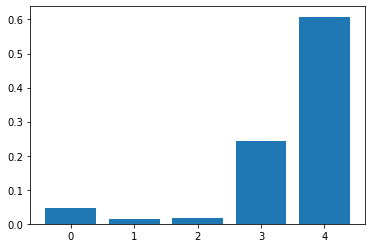

In [62]:
intercept = reg.intercept_
dfx = df.drop('Chance of Admit' , axis=1)
importance = reg.coef_[0]
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [63]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,..... 

In [64]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [65]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-2.5890785958947835

# ANN Model

In [66]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [67]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 5))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                300       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [68]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 112ms/step - loss: 4554.9199 - val_loss: 51.9085
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 2783.8298 - val_loss: 22.6498
Epoch 3/100
2/2 [==============================] - 0s 61ms/step - loss: 1070.2483 - val_loss: 59.6720
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 1681.3689 - val_loss: 120.6405
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 1920.5536 - val_loss: 510.0617
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 989.1683 - val_loss: 684.3516
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 1581.5557 - val_loss: 339.0549
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 995.0842 - val_loss: 86.3853
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 838.0998 - val_loss: 8.6062
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 507.8871

In [70]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1/1 [==============================] - 0s 17ms/step - loss: 1.2100
Accuracy : -0.21004986763000488


In [71]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

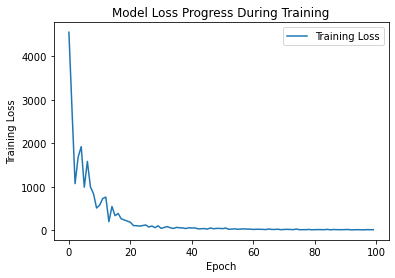

In [72]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# Decesion Tree Model

In [73]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

                    coefficient
GRE Score          7.707231e-01
TOEFL Score        8.253968e-02
University Rating  1.467372e-01
CGPA               5.724956e-17
Research           3.434973e-17
Feature: 0, Score: 0.77072
Feature: 1, Score: 0.08254
Feature: 2, Score: 0.14674
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000


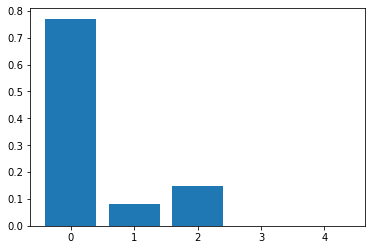

In [74]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = decisionTree_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [75]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

-0.25

# Random Forrest Model

In [76]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_1432/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


-0.2047916666666667

                   coefficient
GRE Score             0.739554
TOEFL Score           0.027068
University Rating     0.135723
CGPA                  0.042512
Research              0.055143
Feature: 0, Score: 0.73955
Feature: 1, Score: 0.02707
Feature: 2, Score: 0.13572
Feature: 3, Score: 0.04251
Feature: 4, Score: 0.05514


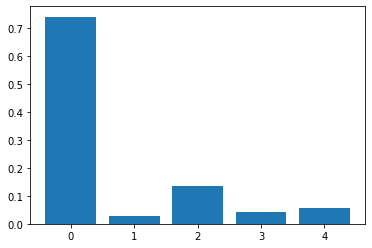

In [77]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = randomForest_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Saving the model to the local file system

In [78]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(randomForest_model, 'filename.joblib')

['filename.joblib']